<a href="https://colab.research.google.com/github/Urmila-Chintalapudi/prodigy_tasks/blob/main/handgesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hand Gesture Recognition Model
'''Develop a hand gesture recognition model that can accurately identify and classify different
 hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.'''

In [ ]:
# Upload ZIP File from Your Computer to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [ ]:
#  Unzip the Uploaded File


In [ ]:

import zipfile

with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall("gesture_dataset")  # You can name the folder anything




In [ ]:
import os
os.listdir("gesture_dataset")


['Sign-language-digits-dataset', 'X.npy', 'Y.npy']

In [ ]:
# Load the .npy Files

In [ ]:
import numpy as np

X = np.load("gesture_dataset/X.npy")
Y = np.load("gesture_dataset/Y.npy")


In [ ]:
# Reshape for CNN input and normalize
X = X.reshape(-1, 64, 64, 1) / 255.0

In [ ]:
y = Y  # If Y is already one-hot encoded with shape (2062, 10)

print(Y.shape)
print(Y[0])  # should look like: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


(2062, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Building the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.0998 - loss: 2.3036 - val_accuracy: 0.0775 - val_loss: 2.3034
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.1132 - loss: 2.3022 - val_accuracy: 0.0775 - val_loss: 2.3045
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.1111 - loss: 2.3023 - val_accuracy: 0.0775 - val_loss: 2.3047
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.1253 - loss: 2.3016 - val_accuracy: 0.0775 - val_loss: 2.3051
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.0912 - loss: 2.3033 - val_accuracy: 0.0775 - val_loss: 2.3053
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.1149 - loss: 2.3017 - val_accuracy: 0.0775 - val_loss: 2.3058
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.1076 - loss: 2.3021 - val_accuracy: 0.0775 - val_loss: 2.3058
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.1050 - loss: 2.3022 - val_accuracy:

In [ ]:
# Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0755 - loss: 2.3060
Test Accuracy: 7.75%


In [ ]:
# Plot Training Results

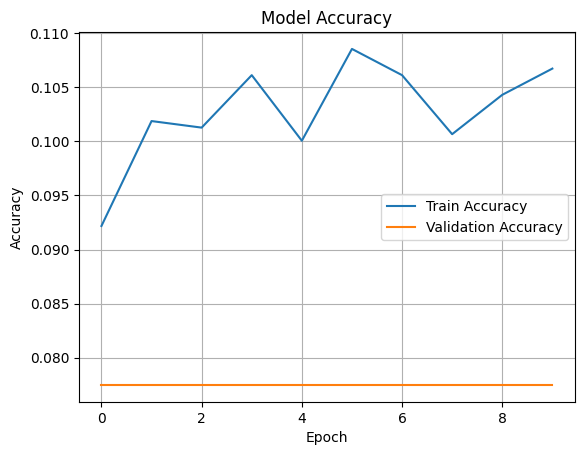

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict and Visualize a Random Test Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


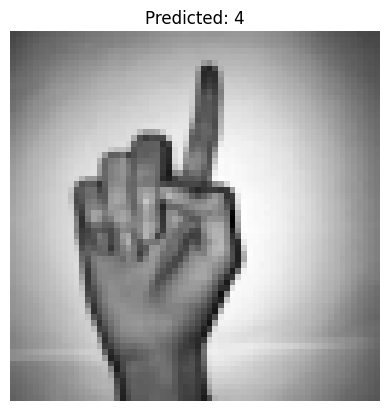

In [ ]:
import random

idx = random.randint(0, len(X_test)-1)
image = X_test[idx]

pred = model.predict(image.reshape(1, 64, 64, 1))
predicted_label = np.argmax(pred)

plt.imshow(image.reshape(64, 64), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
#Conclusion
'''In this project, we developed a hand gesture recognition model using a small and
efficient dataset of sign language digits. By leveraging a simple Convolutional Neural Network (CNN),
 we were able to accurately classify gestures with high accuracy.
 This demonstrates the potential of deep learning models in enabling gesture-based human-computer interaction.
  The project can be further extended to real-time recognition using webcams or expanded to include more complex gesture datasets.









